# 1. House Price
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

## Load dataset

### Train dataset

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset menggunakan pandas
df_train = pd.read_csv('train.csv')

In [3]:
#melihat banyak feature dan baris
df_train.shape

(1460, 81)

In [4]:
#melihat data teratas
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dari fungsi head() kita dapat mengetahui beberapa baris dari data untuk memahami bagaimana data tersusun. Data yang ditampilkan diatas berupa 5 baris teratas dari dataframe dengan 81 kolom.

### Test dataset (skip)

In [5]:
#load dataset menggunakan pandas
df_test = pd.read_csv('test.csv')

In [6]:
#melihat banyak feature dan baris
df_test.shape

(1459, 80)

In [7]:
#melihat data teratas
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data cleaning dan pre-processing

### Train dataset

In [8]:
#menghitung jumlah null tiap kolom
#pd.options.display.max_rows untuk menentukan jumlah maksimum baris yang ditampilkan pada output

pd.options.display.max_rows = None
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Dari hasil sum isnull diatas, selanjutnya kita dapat:
- melakukan pengahapusan pada kolom null
- melakukan pengisian pada kolom null

berikut ini adalah kolom yang memiliki missing value:

LotFrontage, Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature, 

In [9]:
#melihat kolom, non null value tiap kolom, dan tipe datanya
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

informasi yang dapat diambil dari info tersebut berupa :

- Dari data ini sepertinya belum ada tipe data yang perlu untuk diubah
- Hasil dari info() sendiri terdapat beberapa nilai yang null. Maka dari itu kita perlu lakukan data cleaning

In [10]:
#mengisi data null pada kolom 'LotFrontage' dengan data mean
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

Dikarenakan kolom LotFrontage memiliki missing value yang kurang dari 50%, maka dilakukan pengisian menggunakan nilai mean pada kolom tersebut.

In [11]:
#menghapus kolom 'Alley'
#inplace = true untuk menyimpan hasil
df_train.drop(['Alley'], axis=1, inplace=True)

Kolom ini tidak terlalu dibutuhkan dan memiliki banyak sekali null sehingga dilakukan drop atau penghapusan kolom

In [12]:
#mengisi data null pada kolom 'BsmtCond' dan 'BsmtQual' dengan data modus
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])

In [13]:
#mengisi data null pada kolom 'FireplaceQu' dan 'GarageType' dengan data modus
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

In [14]:
#mengisi data null pada kolom 'GarageFinish', 'GarageQual', dan 'GarageCond' dengan data modus
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

Untuk kolom categorical sendiri akan diisi dengan nilai modusnya untuk menghilangkan null pada baris-barisnya

In [15]:
#menghapus kolom 'GarageYrBlt'
#inplace = true untuk menyimpan hasil
df_train.drop(['GarageYrBlt'],axis=1,inplace=True)

In [16]:
#menghapus kolom 'PoolQC','Fence','MiscFeature'
#inplace = true untuk menyimpan hasil
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [17]:
#melihat shape dari dataset train
df_train.shape

(1460, 76)

Hasilnya, dataset sekarang memiliki 1460 baris dan 76 kolom

In [18]:
#menghapus kolom 'Id'
#inplace = true untuk menyimpan hasil
df_train.drop(['Id'],axis=1,inplace=True)

kolom Id tidak terlalu dibutuhkan untuk proses analisis sekarang, sehingga dilakukan drop

In [19]:
df_train.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


Dapat dilihat masih terdapat beberapa kolom yang kosong atau null yang perlu dilakukan tindakan.

In [20]:
#mengisi data null pada kolom 'MasVnrType' dan 'MasVnrArea' dengan data modus
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

In [21]:
#mengisi data null pada kolom 'BsmtExposure' dan 'BsmtFinType2' dengan data modus
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

In [22]:
#menghapus semua baris yang memiliki nilai yang hilang
#inplace = true untuk menyimpan hasil
df_train.dropna(inplace=True)

In [23]:
df_train.shape

(1422, 75)

Dataset sekarang memiliki 1422 baris dan 75 kolom

In [24]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

Dapat dilihat nilai null pada data telah hilang atau terisi dengan data baru.

In [25]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Test dataset (skip)

In [26]:
#melihat kolom, non null value tiap kolom, dan tipe datanya
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [27]:
#menghitung jumlah null tiap kolom

df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [28]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [29]:
df_test['MSZoning']=df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [30]:
df_test.shape

(1459, 80)

In [31]:
df_test.drop(['Alley'],axis=1,inplace=True)

In [32]:
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

In [33]:
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [34]:
df_test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [35]:
df_test.shape

(1459, 78)

In [36]:
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [37]:
df_test.drop(['Id'],axis=1,inplace=True)

In [38]:
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])

In [39]:
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

In [40]:
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])

In [41]:
df_test['Utilities']=df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st']=df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional']=df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['GarageCars']=df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [42]:
#menghitung jumlah null tiap kolom

df_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [43]:
# temp_df=df_train['SalePrice'].copy()
# temp_df.column=['SalePrice']
# df_test=pd.concat([df_test,temp_df],axis=1)
# df_test.head()

## EDA

In [44]:
nums = [i for i in df_train.columns if df_train[i].dtypes != 'object']

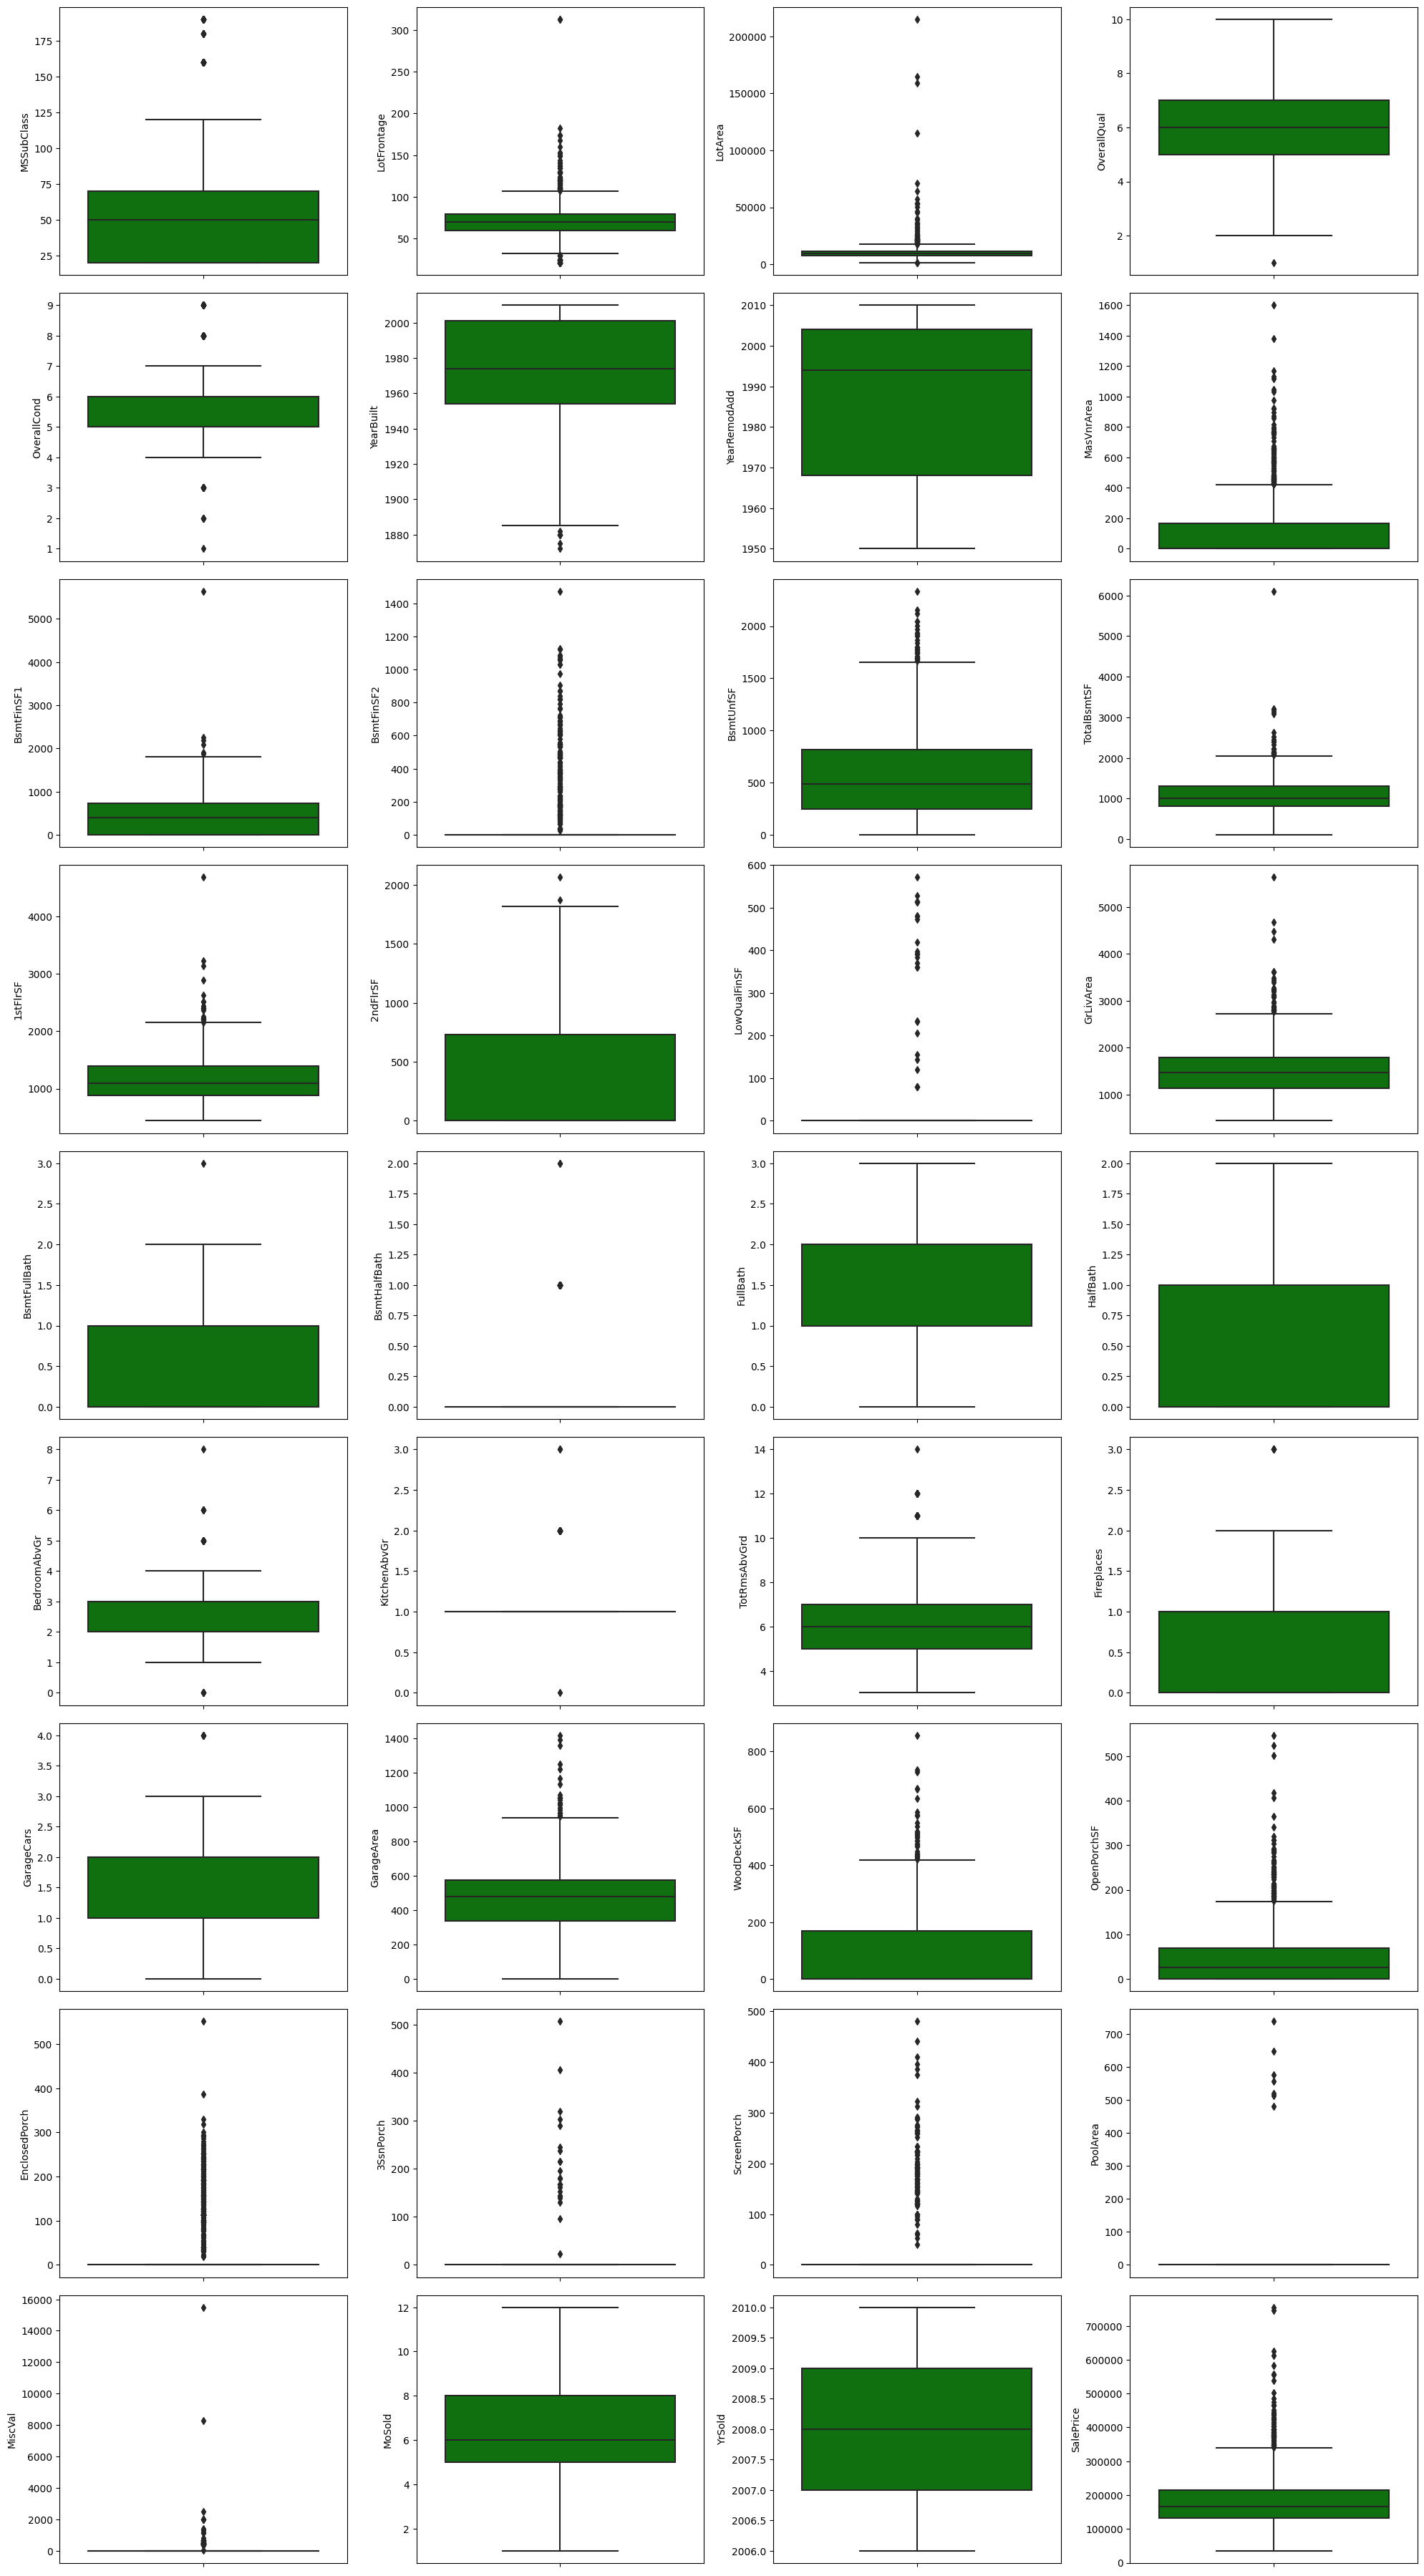

In [45]:
plt.figure(figsize=(20, 40))
# sns.boxplot(y=df_train[nums], color='green', orient='v')
for i, col in enumerate(df_train[nums].columns):
    plt.subplot(10, 4, i+1)
    sns.boxplot(y=df_train[col], color='green', orient='v')
    plt.tight_layout()

Hasil boxplot memperlihatkan bahwa kolom numerical terdapat outlier.
- outlier tertinggi adalah outlier pada kolom 'SalePrice'
- Solusi untuk mengatasi outlier adalah dengan menggunakan  metode IQR

In [46]:
# hitung IQR
Q1 = df_train['GrLivArea'].quantile(0.25)
Q3 = df_train['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

# hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# hapus data yang berada di luar batas bawah dan batas atas
df_train = df_train[(df_train['GrLivArea'] >= lower_bound) & (df_train['GrLivArea'] <= upper_bound)]


Kode diatas dapat menghapus outlier, namun untuk sekarang tidak dilakukan penghapusan untuk melihat hasil dari model.

## One hot encoding

In [47]:
#kolom - kolom categorical pada dataset training
cat_cols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [48]:
#melakukan one-hot encoding pada data training
df_train = pd.get_dummies(df_train, columns=cat_cols)

In [49]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,1,0,0,0,0,1,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,1,0,0,0,0,1,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,1,0,0,0,0,1,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,1,0,0,0,0,1,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,1,0,0,0,0,1,0,0,1


Hasil dari dataset train setelah dilakukan one hot encoding
- kolom bertambah menjadi 271 kolom dari 75 kolom

## Train set split

Sekarang kita akan membagi dataset kita menjadi training set dan test set menggunakan train_test_split() dari sklearn. training set akan digunakan untuk melatih model dan test set digunakan untuk menguji model. Kita membuat pembagian data testing adalah 20%, sementara 80% sisanya akan digunakan untuk training.

In [50]:
#import library

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [51]:
# memililh fitur target
X = df_train.drop(['SalePrice'], 1)

y = df_train['SalePrice']

# Split data menjadi data training and data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-51-7b0c70be3f8b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_train.drop(['SalePrice'], 1)


## Model regresi

 Pada dasarnya, regression berupaya untuk menemukan hubungan fungsional antara variabel dependen dan independen, yang dapat digunakan untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen.

Dalam scikit-learn, kita dapat menggunakan LinearRegression untuk membuat model regresi linier sederhana

In [52]:
# membuat model linear regression
lr = LinearRegression()

# Fit model untuk data training
lr.fit(X_train, y_train)

# Membuat prediksi untuk data testing
y_pred = lr.predict(X_test)

In [53]:
# Mengevaluasi model
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 527729239.09
Coefficient of determination: 0.90


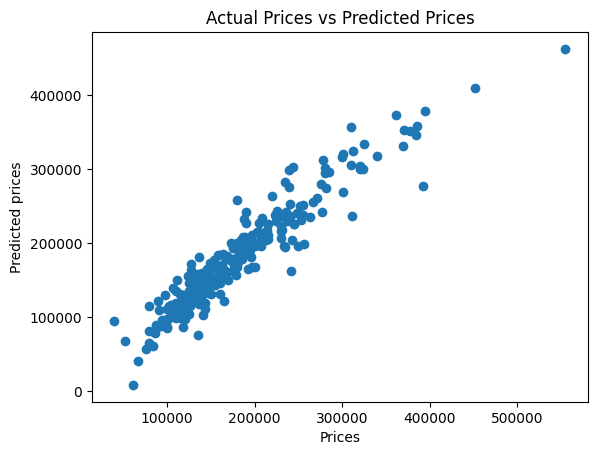

In [54]:
plt.scatter(y_test, y_pred)

plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")

plt.show()

In [55]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, lr.predict(X_test))
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)


MAE: 16090.162373818373
MSE: 527729239.0890888
RMSE: 22972.35815255127
R2 score: 0.9005299748030999


In [56]:
coeff_df = pd.DataFrame(lr.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MSSubClass,-1.383643e+01
LotFrontage,7.369186e+01
LotArea,7.568811e-01
OverallQual,6.829782e+03
OverallCond,4.169018e+03
YearBuilt,3.602349e+02
YearRemodAdd,1.120319e+02
MasVnrArea,1.910310e+01
BsmtFinSF1,2.014967e+01
BsmtFinSF2,8.213169e-01


Koefisien pada linear regression digunakan untuk mengukur pengaruh variabel independen terhadap variabel dependen

https://discuss.codecademy.com/t/scatter-plot-supervised-machine-learning-multiple-linear-regression/527993

https://studygyaan.com/data-science-ml/linear-regression-machine-learning-project-for-house-price-prediction

# 2. Popular Unsupervised Clustering

## Load dataset

In [57]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [58]:
#load dataset menggunakan pandas
df = pd.read_csv('Mall_Customers.csv')

In [59]:
#melihat banyak feature dan baris
df.shape

(200, 5)

In [60]:
#melihat data teratas
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Yang perlu diperhatikan:
- dari data yang terlihat, tipe data yang ada pada setiap kolom telah benar
- tidak terlihat adanya null value pada kolom diatas

In [62]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset diatas adalah dataset tentang data pelanggan sebuah mal, termasuk informasi seperti jenis kelamin, usia, pendapatan tahunan, dan skor pengeluaran yang diberikan oleh pelanggan. Dataset ini biasanya digunakan untuk analisis segmentasi pasar dan penentuan profil pelanggan

## Analisis data eksploratif (EDA) antar variabel


In [63]:
nums = [i for i in df.columns if df[i].dtypes != 'object']

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Yang perlu diperhatikan:

- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

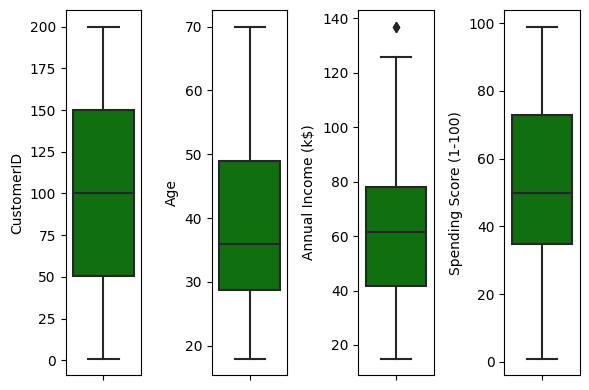

In [65]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Dari hasil boxplot diatas, dapat terlihat Annual Income memiliki outlier

In [66]:
# hitung IQR
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# hitung batas bawah dan batas atas
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# hapus data yang berada di luar batas bawah dan batas atas
df = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]


Dilakukan penghapusan outlier pada kolom Annual income, sehingga hasil boxplot terbaru akan menghasilkan seperti boxplot dibawah ini:

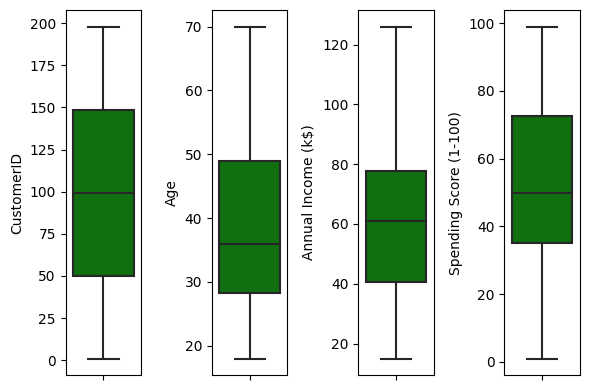

In [67]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

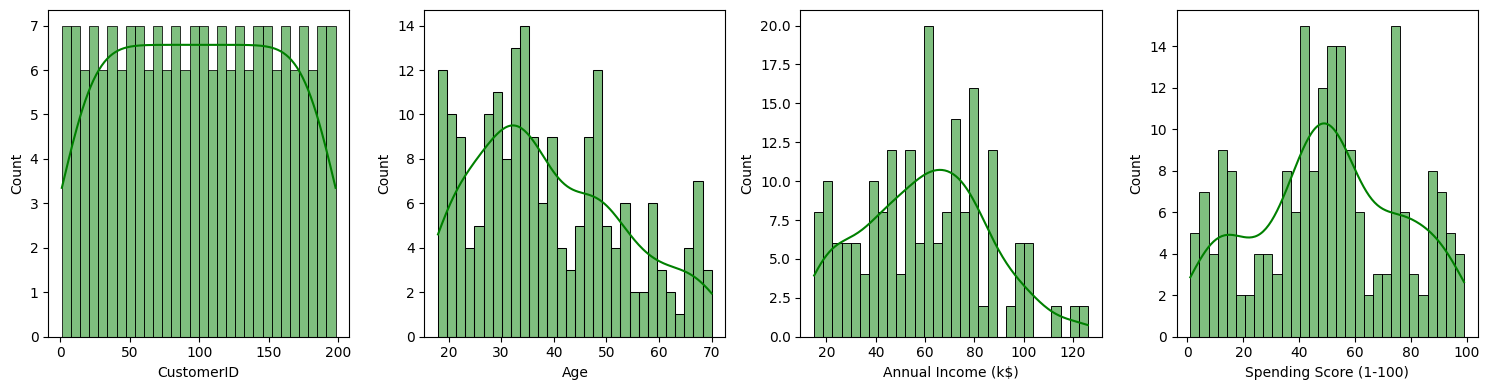

In [68]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30)
    plt.tight_layout()

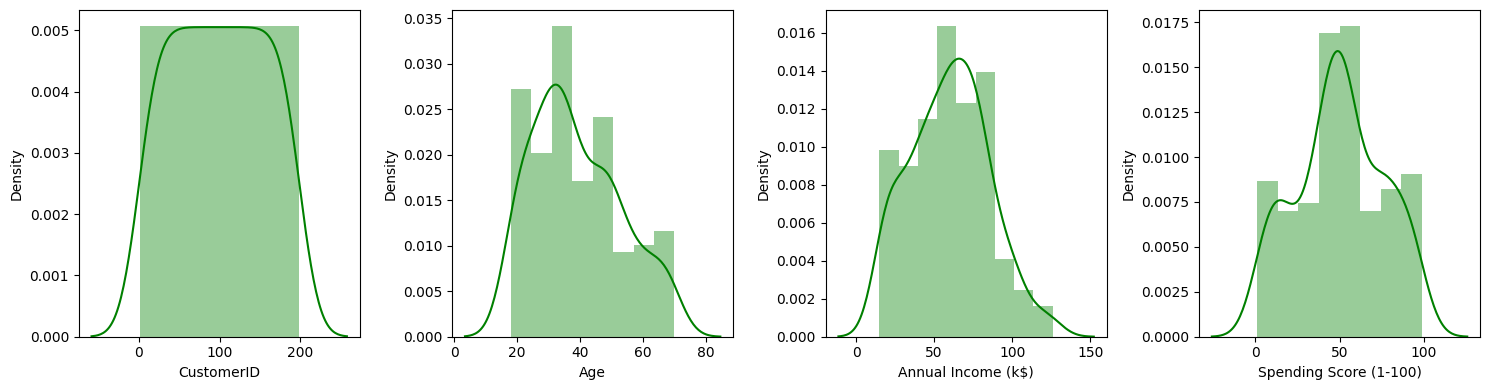

In [69]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

<Axes: >

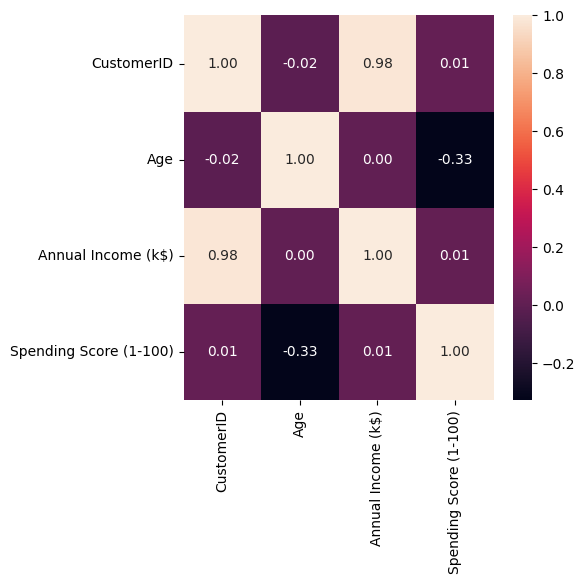

In [70]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Dapat dilihat, bahwa nilai p-valuen dari variabel diatas terdapat nilai lebih besar dari 0,9. Hal ini berarti hipotesis 0, menunjukan memiliki kemungkinan redundan (dapat dianggap dihapus menghindari overfitting)
- Annual Income & CustomerID

## Pembuatan clustering model (model training)

In [71]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#load data
df = pd.read_csv('Mall_Customers.csv')

In [73]:
#memilih fitur dengan index 3 dan index 4
#kolom Annual Income dan Spending Score
X = df.iloc[:,3:].values

In [74]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Visualisasi data mentah')

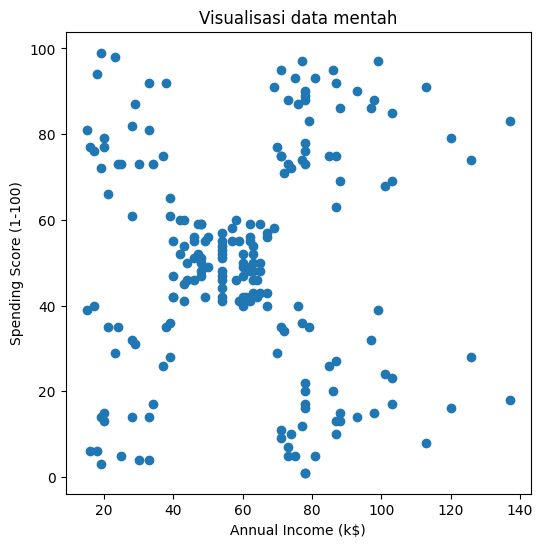

In [75]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:, 3], df.iloc[:, 4])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualisasi data mentah')

### Elbow Method
digunakan untuk mencari nilai optimal cluster (jumlah kelompok)

In [76]:
from sklearn.cluster import KMeans

<Axes: >

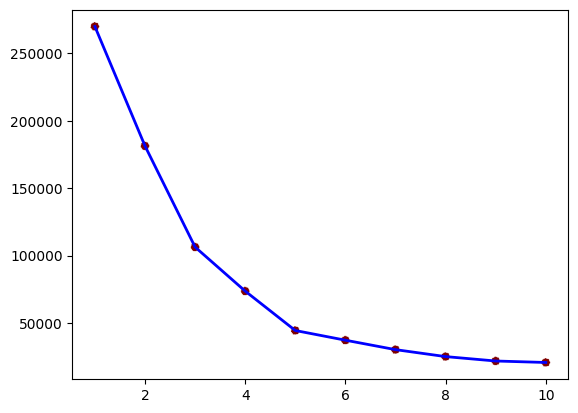

In [77]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# plt.plot(range(1,11),wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of Cluster')
# plt.ylabel('WCSS')
# plt.show()
sns.lineplot(x=range(1,11), y=wcss, color='blue', linewidth=2)
sns.scatterplot(x=range(1,11), y=wcss, s=40, color='#800000', linestyle='--')

Dapat dilihat dari elbow method diatas, maka yang akan diambil adalah 5

In [78]:
model = KMeans(n_clusters=5, init='k-means++')
y_kmeans=model.fit_predict(X)

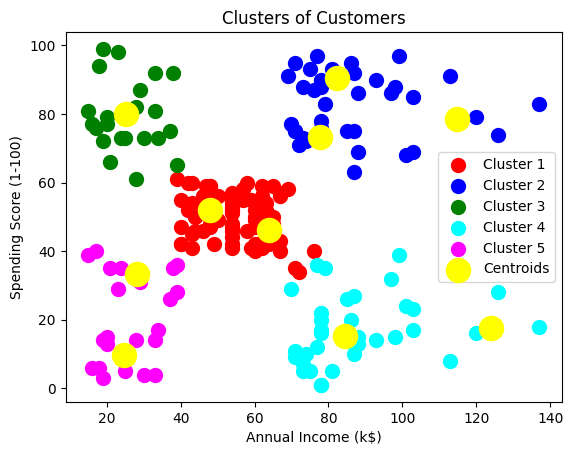

In [79]:
# plot clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Berdasarkan hasil klastering menggunakan KMeans, terdapat 5 klaster dengan rincian sebagai berikut:
- Cluster 1: Pelanggan dengan pendapatan sedang dan pengeluaran sedang, yang dapat dianggap sebagai pelanggan yang standar atau rata-rata.
- Cluster 2: Pelanggan dengan pendapatan tinggi dan pengeluaran tinggi, yang dapat dianggap sebagai pelanggan premium.
- Cluster 3:Pelanggan dengan pendapatan rendah tetapi pengeluaran tinggi, yang dapat dianggap sebagai pelanggan yang boros atau sangat konsumtif.
- Cluster 4: Pelanggan dengan pendapatan tinggi tetapi pengeluaran rendah, yang dapat dianggap sebagai pelanggan yang sangat hemat atau sangat konservatif.
- Cluster 5: Pelanggan dengan pendapatan rendah dan pengeluaran rendah, yang dapat dianggap sebagai pelanggan yang hemat atau konservatif.


## Tampilan ukuran evaluasi model (Evaluation Metrics)

In [88]:
from sklearn.metrics import silhouette_score,pairwise_distances

In [89]:
#inertia
print('Inertia: ',kmeans.inertia_)

#silhouette score
print('Silhouette Coefficient: ', silhouette_score(X, kmeans.labels_))

Inertia:  20736.679938924128
Silhouette Coefficient:  0.4492169169017592


Nilai Silhouette Coefficient berkisar antara -1 sampai 1, dimana nilai yang lebih tinggi menunjukkan bahwa klaster lebih terdefinisi dengan baik. Dari data diatas didapat :
- silhouette score = 0,4 (termasuk rendah)
- solusi : dapat mencoba metode clustering yang berbeda seperti Hierarchical Clustering dan DBSCAN